In [2]:
from module.Iris_recognition import *
from module.Periocular_recognition import *
from module.img_enhance.half_UGV import *
from module.img_enhance.reflection_removal import * 
from module.iris_preprocessing import *
from module.periocular_cnn import *
import os

d:\Users\jimyj\Desktop\TAIST\Thesis\Source_Code\main\module\iris_preprocessing.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# iris_norm_L, iris_norm_R = create_iris_norm_seg('Iris-Dataset/CASIA-Iris-Thousand', None, 1000)

In [4]:
# plot_iris_norm(iris_norm_L, iris_norm_R, 20)

In [5]:
img_p_cl = 10

In [7]:
_, iris_label = load_CASIA('Iris-Dataset/CASIA-Iris-Thousand', img_p_cl)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# _, iris_label = load_UBIPr('Iris-Dataset/UBIPr', img_p_cl)

In [8]:
iris_norm_multi = iris_norm_final(iris_label, 0, 100, 10)

Normalizing:   0%|          | 0/200 [00:00<?, ?it/s]

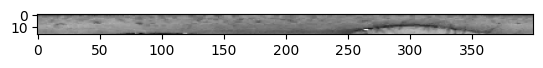

In [11]:
plt.imshow(iris_norm_multi['iris_norm_L'][0], cmap='gray')

In [ ]:
save_iris_norm("temp_data/iris_norm16_CASIA_Thousand.npz", iris_norm_multi)

In [ ]:
# load the features from the file
with np.load('temp_data/iris_norm_UBIPr.npz') as data:
    iris_norm_L = data['iris_norm_L']
    iris_norm_R = data['iris_norm_R']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_norm_img(iris_norm_L, iris_norm_R, iris_norm_L_test=None, iris_norm_R_test=None, image=0):
    figure = plt.figure(figsize=(20, 4))
    figure.add_subplot(2, 2, 1)
    plt.imshow(iris_norm_L[image], cmap='gray')
    figure.add_subplot(2, 2, 2)
    plt.imshow(iris_norm_R[image], cmap='gray')
    if iris_norm_L_test is not None and iris_norm_R_test is not None:
        figure.add_subplot(2, 2, 3)
        plt.imshow(iris_norm_L_test[image], cmap='gray')
        figure.add_subplot(2, 2, 4)
        plt.imshow(iris_norm_R_test[image], cmap='gray')

In [ ]:
# plot_norm_img(iris_norm_L, iris_norm_R, iris_norm_L_test, iris_norm_R_test, image=8)

In [ ]:
# np.save('temp_data/iris_norm_L_all.npy', iris_norm_L)
# np.save('temp_data/iris_norm_R_all.npy', iris_norm_R)

In [ ]:
# iris_norm_L = np.load('temp_data/iris_norm_L_all.npy')
# iris_norm_R = np.load('temp_data/iris_norm_R_all.npy')

In [ ]:
iris_norm_L.shape, iris_norm_R.shape

In [ ]:
iris_norm_L_fold, iris_norm_R_fold = create_fold_norm(iris_norm_L, iris_norm_R, 2)

In [ ]:
iris_norm_L_fold.shape, iris_norm_R_fold.shape

In [ ]:
plt.imshow(iris_norm_L_fold[0])

In [ ]:
plt.imshow(iris_norm_L[2])

In [ ]:
np.where(np.all(iris_norm_L == 0, axis=(1,2)))

In [ ]:
# def create_iris_norm_add(img_folder):

#     iris_norm_L = list(np.load('temp_data/iris_norm_L.npy'))
#     iris_norm_R = list(np.load('temp_data/iris_norm_R.npy'))
   
#     for dir1 in tqdm(os.listdir(img_folder)):
#         for eye in os.listdir(os.path.join(img_folder, dir1)):
#             for file in list(os.listdir(os.path.join(img_folder, dir1, eye))[i] for i in [2, 4, 6, 8]):
#                 if int(dir1) > 954:
#                     image_path= os.path.join(img_folder, dir1, eye, file)
#                     img = read_image(image_path)
#                     _, snake, circles = localization(img, N=400)
#                     pupil_circle = circles
#                     iris_circle = np.flip(np.array(snake).astype(int), 1)
#                     if circles[2] is None:
#                         if eye == 'L':
#                             iris_norm_L.append(np.zeros((64, 400)))
#                         else:
#                             iris_norm_R.append(np.zeros((64, 400)))
#                     else:
#                         # Image Preprocessing (Normalization)
#                         iris_norm = normalization(img, pupil_circle, iris_circle)
#                         if eye == 'L':
#                             iris_norm_L.append(iris_norm)
#                         else:
#                             iris_norm_R.append(iris_norm)
#         # np.save('temp_data/iris_norm_L.npy', iris_norm_L)
#         # np.save('temp_data/iris_norm_R.npy', iris_norm_R)
                
#     return np.array(iris_norm_L), np.array(iris_norm_R)

In [ ]:
# iris_norm_L, iris_norm_R = create_iris_norm_add('Iris-Dataset/CASIA-Iris-Thousand')

In [ ]:
img_1_fol = 949
img_1_item = 3
img_1_L = read_image(
    f'Iris-Dataset/CASIA-Iris-Thousand/{str(img_1_fol).zfill(3)}/L/S5{str(img_1_fol).zfill(3)}L{str((img_1_item + 1)*2).zfill(2)}.jpg')
img_1_R = read_image(
    f'Iris-Dataset/CASIA-Iris-Thousand/{str(img_1_fol).zfill(3)}/R/S5{str(img_1_fol).zfill(3)}R{str((img_1_item + 1)*2).zfill(2)}.jpg')


In [ ]:
img = img_1_R

_, snake, circles = localization(img, N=400)

pupil_circle = circles
iris_circle = np.flip(np.array(snake).astype(int), 1)

if circles[2] is None:
    print('No Iris')
else:
    # Image Preprocessing (Normalization)
    iris_norm_new = normalization(img, pupil_circle, iris_circle)

In [ ]:
plt.imshow(iris_norm_new)

In [ ]:
plt.imshow(iris_norm_R[(img_1_fol)* 4 + img_1_item])